<a href="https://colab.research.google.com/github/wphall/CO2-Equilibrium/blob/main/Student_Notebook_CO2_Equilibrium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploring the Connection Between Atmospheric Carbon Dioxide and Ocean Acidification through a Python Coding Exercise
### W. Paige Hall and Kevin Cantrell
In this coding activity you will explore the connection between atmospheric carbon dioxide and ocean acidity. The python script you create will allow you to determine the equilibrium concentrations of each chemical species in a system comprising carbon dioxide and water. Using the equilibrium concentration of $H^+$, you will calculate aqueous pH and create a plot that demonstrates its dependence on the atmospheric partial pressure of carbon dioxide.

# Part 0: A Primer for Solving Equilibrium Problems Using Python

If you are unfamiliar with Python or need a reminder about framing equilibrium calculations using charge and mass balance relationships,  you may want to complete this [self-guided exercise](https://colab.research.google.com/drive/1UyyLiq0b4od7nEySMXhpd4WJ78axGU_O?usp=sharing) before tackling this more complex problem with several equilibrium expressions.

# Part I: The Chemistry
Atmospheric $CO_2$ and dissolved $CO_2$ can exist in thermodynamic equilibrium ([Zeebe, 2012](https://www.annualreviews.org/doi/abs/10.1146/annurev-earth-042711-105521)):

  $𝐶𝑂_{2 \, (g)} \rightleftharpoons 𝐶𝑂_{2 \, (aq)}$

At equilibrium, the amount of dissolved $CO_2$ can be determined using Henry’s constant ($K_H$):

  $𝐶𝑂_{2 \, (aq)} = K_HP_{CO_2}$ (Eq. 1)

Where $P_{CO_2}$ is the partial pressure of $CO_2$ in the atmosphere.

At a typical pH of 8.2 of surface seawater, the dominant form of carbon exists as bicarbonate ion due to the dissociation of carbonic acid in water ([Dickson, 2010](https://www.pmel.noaa.gov/co2/files/dickson_thecarbondioxidesysteminseawater_equilibriumchemistryandmeasurementspp17-40.pdf)):

  $𝐶𝑂_{2 \, (aq)} + H_2O \rightleftharpoons H_2𝐶𝑂_{3 \, (aq)}$ (Eq. 2a, $K_{eq}$ = $1.70 \times{} 10^{-3}$)

  $H_2𝐶𝑂_{3 \, (aq)} \rightleftharpoons H^+_{ \, (aq)} + HCO_{3 \, (aq)}^-$ (Eq. 2b, $K^{'}_{a}$ = $2.62 \times{} 10^{-4}$)

  By convention equations 2a and 2b are combined with $𝐶𝑂^*_{2 \, (aq)}$ representing the total concentration of both uncharged species ($H_2𝐶𝑂_{3 \, (aq)}$ and  $𝐶𝑂_{2 \, (aq)}$) thus Ka1 is
  
  $𝐶𝑂^*_{2 \, (aq)} + H_2O \rightleftharpoons H^+_{ \, (aq)} + HCO_{3 \, (aq)}^-$ (Eq. 2)

  $HCO_{3 \, (aq)}^- \rightleftharpoons H^+_{ \, (aq)} + CO_{3 \, (aq)}^{2-}$ (Eq. 3)

where $pK_{a1} = 6.351$, and $pK_{a2} = 10.329$ at 25°C ([Goldberg et al., 2002](https://www.nist.gov/system/files/documents/srd/jpcrd615.pdf)).

Due to these processes, the amount of dissolved $CO_2$ strongly influences the acidity of the oceans.  Two other chemical reactions that govern the pH of the ocean are the dissociation of of water and the dissociation of limestone, $CaCO_3$, which produces the base carbonate and the

We can solve the simultaneous equations associated with this equilibrium system using the [fsolve function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html) from the scipy library in Python.

# Part II: Defining the System of Equations
The first step in defining our system of equations is to identify all the reactions pertinent to the aqueous system. In addition to equations 1 - 3 outlined above, we must also consider the dissociation of water. In the markdown cell below, type out the equilibrium expression for each of these four chemical processes. Use the [Colab Markdown Guide](https://colab.research.google.com/notebooks/markdown_guide.ipynb) to ensure that your expressions are properly formatted.

###Aqueous Equilibrium Expressions

$Eq_{1}   \textrm{ where K}_{\textrm{Hn}} \textrm{ = } 3.40×10^{−2} \textrm{ = }\mathrm{\frac{[\color{Purple}{CO^{*}_{2 \,(aq)}}]} {\color{Teal} {P_{CO_{2 \,(g)}}}}} $

$Eq_{2}   \textrm{ where K}_{\textrm{a1}} \textrm{ = } 4.46×10^{−7} \textrm{ = }\mathrm{\frac{[\color{Red} {H^+_{(aq)}}][\color{Darkgreen} {HCO^-_{3 \, (aq)}}]} {[\color{Purple}{CO^{*}_{2 \,(aq)}}]}} $

$Eq_{3}   \textrm{ where K}_{\textrm{a2}} \textrm{ = } 4.69×10^{−11} \textrm{ = }\mathrm{\frac{[\color{Red} {H^+_{(aq)}}][\color{DarkBlue}{CO^{2-}_{3 \, (aq)}}]} {[\color{Darkgreen} {HCO^-_{3 \, (aq)}}]}} $

$Eq_{4}   \textrm{ where K}_{\textrm{W}} \textrm{ = } 1.00×10^{−14} \textrm{ = }\mathrm{[\color{Red} {H^+_{(aq)}][\color{Black} {OH^{-}_{(aq)}}]}} $

$Eq_{5}   \textrm{ where K}_{\textrm{sp}} \textrm{ = } 4.6×10^{−9} \textrm{ = }\mathrm{[\color{Brown}{Ca^{2+}_{(aq)}}]{[\color{DarkBlue} {CO_{3 \, (aq)}^{2-}} ]}} $


###Charge Balance
In addition to our equilibrium expressions we must also have an equation that describes the charge balance in the system. The charge balance formula is

$n_1[C_1] + n_2[C_2] +  ... m_1[A_1] + m_2[A_2] +  ...= 0$

Where, e.g., $[C_1]$ is the concentration of cation 1 and $n_1$ is the charge on cation 1, and $[A_1]$ is the concentration of anion 1 and $m_1$ is the charge on anion 1. This equation ensures that the overall charge in the system is zero. Write the charge balance equation for your aqueous system in the markdown cell below.

###Charge Balance Equation

$[H^{+}]$ + 2[$Ca^{2+}$] - [$HCO_3^{-}$]- 2[$CO_3^{2-}$] - [$OH^-$]

###Mass Balance
Another necessary equation is the mass balance equation. This equation ensures that the total amount of all forms of a given species in solution is equal to the amount of that species originally introduced to the solution. For example, consider the dissociation of phosphoric acid, $H_3PO_4$, which dissociates to $H_2PO_4^-$, $HPO_4^{2-}$, and $PO_4^{3-}$. If we call the initial concentration of phosphoric acid $[H_3PO_4]_{initial}$, then the mass balance equation can be written as

$[H_3PO_4]_{initial}=[H_3PO_4]+[H_2PO_4^{-}]+[HPO_4^{2-}]+[PO_4^{3-}]$

Where the right hand side of the equation represents the equilibrium concentration of each phosphate species. In the markdown cell below, write the mass balance equation for aqueous carbon dioxide.

In the markdown cell below, write the mass balance equation for solid calcium carbonate in a saturated solution. The dissociation will produce $Ca^{2+}$ and $CO_3^{2-}$ ions in a 1-to-1 ratio.  All of the dissolved calcium atoms will exist as $Ca^{2+}$ (there may also be ion pairs, but we will ignore them throught this calculation) The carbon atoms can react with water and form $CO_3^{2-}$, $HCO_3^{-}$,   $CO^*_{2 \, (aq)}$, and even some $CO_{2 \, (g)}$

###Mass Balance Equation

[$Ca^{2+}$] = [$CO_3^{2-}$] + [$HCO_3^{-}$] + [$H_2CO_3$] + [$CO_{2 (aq)}$] + [$CO_{2 (g)}$]

or

[$Ca^{2+}$] =  [$CO_3^{2-}$] + [$HCO_3^{-}$] + [$CO^*_{2 (aq)}$] + [$CO_{2 (g)}$]

#Part III: Defining the Variables and Equations in Python
To find the solutions to a set of equations, it is necessary for the number of equations to match the number of variables. In the mardown cell below, identify and list all of the chemical variables from the set of equations you defined above. Does your number of variables match your number of equations?

We have seven unknowns: $\mathrm{ \color{Teal}{P_{CO_{2 \,(g)}}}}$ $\mathrm{ [\color{Purple}{CO^{*}_{2 \,(aq)}}]}$ $\mathrm{[\color{Darkgreen} {HCO^-_{3 \, (aq)}}]}$ $\mathrm{ [\color{DarkBlue}{CO^{2-}_{3 \, (aq)}}]}$ $\mathrm{ [\color{Red}{H^+_{(aq)}}]}$ $\mathrm{ [\color{Black}{OH^{-}_{(aq)}}]}$ $\mathrm{ [\color{Brown}{Ca^{2+}_{(aq)}}]}$

We have seven equations: $K_H$, $K_{a1}$, $K_{a2}$, $K_W$, $K_{sp}$, charge balance, and mass balance

To solve for the concentrations at equilibrium will take advantage of the [fsolve function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html) from the SciPy library in Python. The fsolve function is one (of many) that automates searching for the roots (or zeros) of a system of equations.  It uses an algorithm find the values of x that make each of the equations in a user defined function $f(x)$ as close as possible to zero.

This [fsolve video tutorial](https://youtu.be/q2wFx5aj3Lg?si=qgXpanjxjFdeGvd3) walks through an example fsolve problem step-by-step. Before tackling the carbon dioxide/carbonate system, work through the tutorial and write a Python script that solves for $x$, $y$, and $z$ in the set of three equations above.

Once you have completed the tutorial, take your set of seven CO$_2$ equations and rearrange them so that they all equal zero. We will call the equations f0 - f6 according to the following convention:

f0 describes Henry's Law, $K_H$

f1 describes the dissociation of carbonic acid, $K_{a1}$

f2 describes the dissociation of bicarbonate, $K_{a2}$

f3 describes the dissociation of water, $K_W$

f4 describes the dissociation of calcium carbonate $K_{sp}$

f5 shows charge balance

f6 shows mass balance

When writing these equations in our user defined function f(x), we must have the concentrations stored in a single input array with the name "x" where x[0] ... x[6] correspond to the amounts of each species so that we can pass all of our adjustable variables into our function.  For convenience later, we will also use 3 letter abreviations in our code when doing a calculation outside our function (see below).


atm = $\mathrm{ x[0]=\color{Teal}{P_{CO_{2 \,(g)}}}}$

co2 = $\mathrm{ x[1]=[\color{Purple}{CO^{*}_{2 \,(aq)}}]}$

bct = $\mathrm{ x[2]=[\color{Darkgreen} {HCO^-_{3 \, (aq)}}]}$

car = $\mathrm{ x[3]=[\color{DarkBlue}{CO^{2-}_{3 \, (aq)}}]}$

hdr = $\mathrm{ x[4]=[\color{Red}{H^+_{(aq)}}]}$

hox = $\mathrm{ x[5]=[\color{Black}{OH^{-}_{(aq)}}]}$

cal = $\mathrm{ x[6]=[\color{Brown}{Ca^{2+}_{(aq)}}]}$

In [ ]:
import numpy as np                    #the numpy library contains fast math functions designed to operate on and store arrays of numbers
import matplotlib.pyplot as plt       #the matplotlib.pyplot library is used to make plots and figures
import pandas as pd                   #the pandas library deals with named columns and rows of data called a dataframe (similar to an Excel worksheet with customizable row and column labels)
from scipy.optimize import fsolve     #the scipy library has thousands of functions, fsolve is one for searching for the roots of a system of equations
from google.colab import data_table   #this colab library supports nice display (formatting) and interaction (sorting, downloading) with tables of data including pandas dataframes

data_table.enable_dataframe_formatter()                       #turn on interactive, nice formatting of tabular data
data_table._DEFAULT_FORMATTERS[float] = lambda x: f"{x:.3e}"  #change the default number format to be scientific notation with 3 digits after the decimal

Kh=3.40e-2            #Kh  = co2/atm      = x[1]/x[0]
Ka1=4.46e-7           #Ka1 = hdr*bct/co2  = x[4]*x[2]/x[1]
Ka2=4.69e-11          #Ka2 = hdr*car/bct  = x[4]*x[3]/x[2]
Kw=1.0e-14            #Kw  = hdr*hox      = x[4]*x[5]
Ksp=4.6e-9            #Ksp = cal*car      = x[6]*x[3]

#recall all the equations in our function must be rearranged so that 0 is the ideal result
#our function will take an input array (called "x") that contains seven variable estimates of the amounts
#our function will output a value for each equation. These "residuals" are what fsolve will minimize

def FunCO2OnlyFixed(x):                     #our function's input is an array called "x" while inside the function, indexing starts with zero
    f0=x[1]-(Kh*x[0])                       #Henry's Law
    f1=x[4]*x[2]-(Ka1*x[1])                 #Ka1 of dissolved CO2 to bicarbonate
    f2=x[4]*x[3]-(Ka2*x[2])                 #Ka2 of bicarbonate to carbonate
    f3=x[4]*x[5]-Kw                         #Kw, dissociation of water
    f4=x[6]                                 #[calcium]=0
    f5=x[4]+2*x[6]-x[2]-2*x[3]-x[5]         #charge balance
    f6=x[0]-atm                             #partial pressure is constant and always equal to the value stored in the variable atm
    return np.array([f0,f1,f2,f3,f4,f5,f6]) #return the signed residual of each equation

def FunCO2OnlyFinite(x):
    f0=x[1]-(Kh*x[0])
    f1=x[4]*x[2]-(Ka1*x[1])
    f2=x[4]*x[3]-(Ka2*x[2])
    f3=x[4]*x[5]-Kw
    f4=x[6]
    f5=x[4]+2*x[6]-x[2]-2*x[3]-x[5]
    f6=x[1]+x[2]+x[3]-(Kh*atm)              #allows partial pressure of CO2 (x[0]) to change and limits the amount of dissolved carbon
    return np.array([f0,f1,f2,f3,f4,f5,f6])

In addition to the [Python](https://www.oreilly.com/content/a-whirlwind-tour-of-python/) language we also import to use later some fundamental libraries for scientific computing:
* [Numpy](https://numpy.org/doc/stable/user/absolute_beginners.html) for calculations
* [Matplotlib](https://matplotlib.org/stable/users/explain/quick_start.html) for making graphs
* [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#) for storing large data sets
* [Scipy](https://docs.scipy.org/doc/scipy/tutorial/index.html) for functions
* [Data_Table](https://colab.research.google.com/notebooks/data_table.ipynb) for formatting tables of data in Colab

In the atmospheric $CO_2$ only case, we will not have any calcium carbonate. The Ksp equation, `f4=x[6]`, simply insists that [$Ca^{2+}$]=0.  Later in our calculations, when calcium carbonate is present (water in contact with limestone is called a calcareous water), f4 will be a rearrangement of its Ksp equilibrium. ```f4=x[6]*x[3]-Ksp```

In the atmospheric $CO_2$ only case, we will consider two possible limits for the total amount of dissolved carbon. We have created two complete and separate functions for the 7 equations that only differ in their mass balance relationship, f6.

In one case (called "FunCO2OnlyFixed") we assume the partial pressure of atmospheric $CO_2$ stays constant (there is an infinite suppy), and is always equal to the starting partial pressure (x[0]=atm). In "FunCO2OnlyFixed" ```f6=x[0]-atm```

In the other case (called "FunCO2OnlyFinite") we assume the partial pressure of atmospheric $CO_2$ decreases as it dissolves in water (a finite suppy), and x[0] is variable.  The initial amount that dissolves is Henry's constant times the starting pressure (atm). This value is an upper limit for total amount of dissolved carbon (x[1]+x[2]+x[3]). In "FunCO2OnlyFinite" ```f6=x[1]+x[2]+x[3]-(Kh*atm)```

Note: We could not use then bound ```f6=x[1]+x[2]+x[3]-(Kh*x[0])```, because it, combined with ```f0=x[1]-(Kh*x[0])```, would force carbonate and bicarbonate to be zero.

#Part V: Define Estimates for Each Variable
To use fsolve to find values for each variable in our system of equations, we must supply it with a reasonable estimate for the value of each variable. To estimate the equilibrium concentrations of each species we will start by using Henry's Law and the current atmospheric partial pressure of carbon dioxide. Use a resource such as the [National Oceanic and Atmospheric Association](https://gml.noaa.gov/ccgg/trends/) to look up the current partial pressure of CO$_2$. In the code cell below, convert the pressure to atm and use Henry's Law constant, $K_H=0.034 \frac{mol}{L \cdot atm}$, to calculate an initial estimate for the concentration of aqueous carbon dioxide, [CO$_2(aq)$]. Give the estimate a simple name that can be called on later. Using your equilibrium expressions, calculate initial guesses for all the remaining aqueous species in the code cell and give each guess a name. Finally, use numpy.array to store all your guesses in an array named xguess.


**Activity**: Complete the provided starter script that solves for each concentration.  Extend the following code segment to load the array "xguess" with reasonable values if we only consider atmospheric $CO_2$ as a source of carbon.

In [ ]:
import numpy as np                          #the numpy library contains fast math functions designed to operate on and store arrays of numbers
import matplotlib.pyplot as plt             #the matplotlib.pyplot library is used to make plots and figures
import pandas as pd                         #the pandas library deals with named columns and rows of data called a dataframe (similar to an Excel worksheet with customizable row and column labels)
from scipy.optimize import fsolve           #the scipy library has thousands of functions, fsolve is one for searching for the roots of a system of equations
from google.colab import data_table         #this colab library supports nice display (formatting) and interaction (sorting, downloading) with tables of data including pandas dataframes
data_table.enable_dataframe_formatter()                       #turn on interactive, nice formatting of tabular data
data_table._DEFAULT_FORMATTERS[float] = lambda x: f"{x:.3e}"  #change the default number format to be scientific notation with 3 digits after the decimal

Kh=3.40e-2                                  #Kh  = co2/atm      = x[1]/x[0]
Ka1=4.46e-7                                 #Ka1 = hdr*bct/co2  = x[4]*x[2]/x[1]
Ka2=4.69e-11                                #Ka2 = hdr*car/bct  = x[4]*x[3]/x[2]
Kw=1.0e-14                                  #Kw  = hdr*hox      = x[4]*x[5]
Ksp=4.6e-9                                  #Ksp = cal*car      = x[6]*x[3]

def FunCO2OnlyFixed(x):                     #this function defines a CO2 only system with a fixed partial pressure
    f0=x[1]-(Kh*x[0])                       #Henry's Law
    f1=x[4]*x[2]-(Ka1*x[1])                 #Ka1 of dissolved CO2 to bicarbonate
    f2=x[4]*x[3]-(Ka2*x[2])                 #Ka2 of bicarbonate to carbonate
    f3=x[4]*x[5]-Kw                         #Kw, dissociation of water
    f4=x[6]                                 #[calcium]=0
    f5=x[4]+2*x[6]-x[2]-2*x[3]-x[5]         #charge balance
    f6=x[0]-atm                             #partial pressure is constant and always equal to the value stored in the variable atm
    return np.array([f0,f1,f2,f3,f4,f5,f6]) #return the signed residual of each equation, in a perfect fit each will be zero

def FunCO2OnlyFinite(x):                    #this function defines a CO2 only system with a variable partial pressure
    f0=x[1]-(Kh*x[0])                       #Henry's Law
    f1=x[4]*x[2]-(Ka1*x[1])                 #Ka1 of dissolved CO2 to bicarbonate
    f2=x[4]*x[3]-(Ka2*x[2])                 #Ka2 of bicarbonate to carbonate
    f3=x[4]*x[5]-Kw                         #Kw, dissociation of water
    f4=x[6]                                 #[calcium]=0
    f5=x[4]+2*x[6]-x[2]-2*x[3]-x[5]         #charge balance
    f6=x[1]+x[2]+x[3]-(Kh*atm)              #allows partial pressure of CO2 (x[0]) to change and limits the amount of dissolved carbon
    return np.array([f0,f1,f2,f3,f4,f5,f6]) #return the signed residual of each equation, in a perfect fit each will be zero

#start by setting the variable ppm to the current mixing ratio of CO2 in ppmv
ppm=425

#partial pressure of CO2 gas in atmospheres
atm=ppm/1.0e6

#initial guess for dissolved concentration based on Kh
co2=atm*Kh

#initial guess for bicarbonate concentration based on Ka1
bct=np.sqrt(Ka1*co2)

#initial guess for hydronium concentration based on Ka1
hdr=np.sqrt(Ka1*co2)

#initial guess for hydroxide concentration based on hydronium and Kw
hox=Kw/hdr

#initial guess for carbonate concentration based on Ka2
car=Ka2*bct/hdr

#initial guess for calcium is zero, in the CO2 only case
cal=0.0

xguess=np.array([atm,co2,bct,car,hdr,hox,cal]) #here we pack the seven individual amounts into an array, which we can pass into our functions
print("Intial estimates = ",xguess)
resGuessFix=FunCO2OnlyFixed(xguess)
print("Residuals in estimates for fixed partial pressure= ",resGuessFix)
errorFix=np.sqrt(np.sum(resGuessFix**2))
print("standard error for estimates for fixed partial pressure = ",errorFix)

resGuessFin=FunCO2OnlyFinite(xguess)
print("Residuals in estimates for variable partial pressure= ",resGuessFin)
errorFin=np.sqrt(np.sum(resGuessFin**2))
print("standard error for estimates for variable partial pressure = ",errorFin)


Intial estimates =  [4.25000000e-04 1.44500000e-05 2.53864137e-06 4.69000000e-11
 2.53864137e-06 3.93911488e-09 0.00000000e+00]
Residuals in estimates for fixed partial pressure=  [ 0.00000000e+00 -8.07793567e-28  0.00000000e+00 -1.57772181e-30
  0.00000000e+00 -4.03291488e-09  0.00000000e+00]
standard error for estimates for fixed partial pressure =  4.032914883426029e-09
Residuals in estimates for variable partial pressure=  [ 0.00000000e+00 -8.07793567e-28  0.00000000e+00 -1.57772181e-30
  0.00000000e+00 -4.03291488e-09  2.53868827e-06]
standard error for estimates for variable partial pressure =  2.5386914722278645e-06


Notice that all five equilibrium residuals are all very close to zero (our guesses based on independent equilbria are very close!)  

In both systems, the charge balance relationship is off with a bit of excess negative charge.  The system needs a bit more hydronium (hdr, x[4]) ion from $K_{a2}$.

In the variable partial pressure system, the mass balance is also off,  we need to bring down the value for the partial pressure (atm, x[0]) to account for the carbon that dissolves.

**Activity**: Run the following code segment to optimize the concentrations using fsolve, store the results in a pandas dataframe, and make a chart of the dissolved carbon and calcium concentrations

Optimized estimates for fixed partial pressure =  [ 4.25000000e-04  1.44500000e-05  2.53662735e-06  4.68256137e-11
  2.54065699e-06  3.93598980e-09 -5.39635096e-34]
Residuals in estimates for fixed partial pressure=  [ 0.00000000e+00 -8.02139012e-25  5.91088299e-26 -1.15804781e-27
 -5.39635096e-34  1.81979735e-23  0.00000000e+00]
errorFix =  1.8215739370902608e-23
Optimized estimates for variable partial pressure =  [ 3.56663003e-04  1.21265421e-05  2.32341109e-06  4.68115612e-11
  2.32780062e-06  4.29589915e-09 -8.13136260e-36]
Residuals in estimates for variable partial pressure=  [ 0.00000000e+00 -2.22456493e-21  7.25908498e-25 -3.30603847e-21
 -8.13136260e-36 -2.75451144e-22 -3.38813179e-21]
errorFix =  5.237737141005371e-21


,atm,co2,bct,car,hdr,hox,cal
CO2 Only (Start),0.000425,0.000014,0.000003,4.690000e-11,0.000003,3.939115e-09,0.000000e+00
CO2 Only (Fixed),0.000425,0.000014,0.000003,4.682561e-11,0.000003,3.935990e-09,-5.396351e-34
CO2 Only (Variable),0.000357,0.000012,0.000002,4.681156e-11,0.000002,4.295899e-09,-8.131363e-36


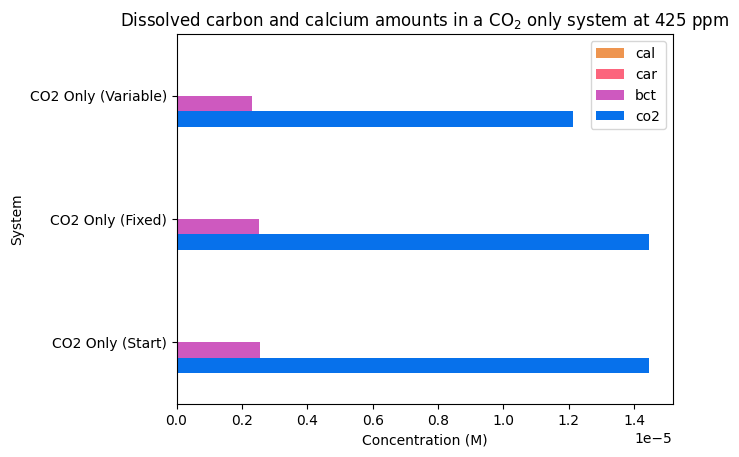

In [ ]:
xFix=fsolve(FunCO2OnlyFixed,xguess)
print("Optimized estimates for fixed partial pressure = ",xFix)
resFix=FunCO2OnlyFixed(xFix)
print("Residuals in estimates for fixed partial pressure= ",resFix)
errorFix=np.sqrt(np.sum(resFix**2))
print("errorFix = ",errorFix)

xFin=fsolve(FunCO2OnlyFinite,xguess)
print("Optimized estimates for variable partial pressure = ",xFin)
resFin=FunCO2OnlyFinite(xFin)
print("Residuals in estimates for variable partial pressure= ",resFin)
errorFin=np.sqrt(np.sum(resFin**2))
print("errorFix = ",errorFin)

dfCO2Only=pd.DataFrame(columns=["atm","co2","bct","car","hdr","hox","cal"]) #here we make an empty dataframe to hold all our results with 7 named columns, one for each unknown

dfCO2Only.loc["CO2 Only (Start)"]=xguess
dfCO2Only.loc["CO2 Only (Fixed)"]=xFix
dfCO2Only.loc["CO2 Only (Variable)"]=xFin

chartColors = ['#0771eb','#ce59bf','#fc657d','#ee9550']                     #from https://www.learnui.design/tools/data-color-picker.html#palette
ax = dfCO2Only[['co2','bct','car','cal']].plot(kind='barh',
                                               color=chartColors,
                                               rot=0,
                                               ylabel='System',
                                               xlabel='Concentration (M)',
                                               title="Dissolved carbon and calcium amounts in a $\mathrm{CO_2}$ only system at "+ str(ppm)+" ppm"
                                               )
plt.legend(loc='upper right',reverse=True)
dfCO2Only

,atm,co2,bct,car,hdr,hox,cal
CAR_Only Start,0.000000e+00,0.000000e+00,0.000054,0.000014,1.848507e-10,0.000054,0.000068
CAR_Only Opt fsolve,6.495223e-07,2.208376e-08,0.000088,0.000037,1.121424e-10,0.000089,0.000125


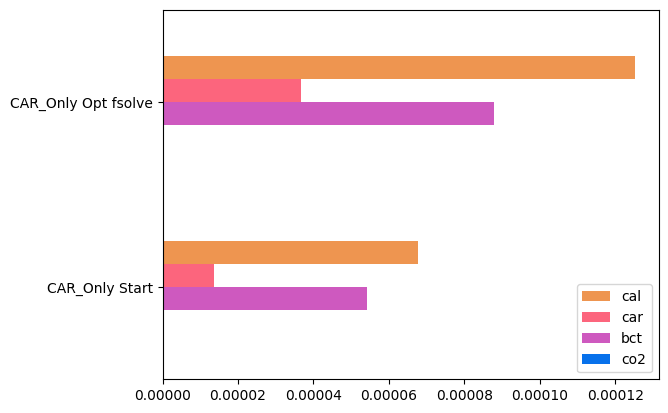

In [ ]:
#carbonate only system
import numpy as np                          #the numpy library contains fast math functions designed to operate on and store arrays of numbers
import matplotlib.pyplot as plt             #the matplotlib.pyplot library is used to make plots and figures
import pandas as pd                         #the pandas library deals with named columns and rows of data called a dataframe (similar to an Excel worksheet with customizable row and column labels)
from scipy.optimize import fsolve           #the scipy library has thousands of functions, fsolve is one for searching for the roots of a system of equations
from google.colab import data_table         #this colab library supports nice display (formatting) and interaction (sorting, downloading) with tables of data including pandas dataframes
data_table.enable_dataframe_formatter()                       #turn on interactive, nice formatting of tabular data
data_table._DEFAULT_FORMATTERS[float] = lambda x: f"{x:.3e}"  #change the default number format to be scientific notation with 3 digits after the decimal

Kh=3.40e-2                                  #Kh  = co2/atm      = x[1]/x[0]
Ka1=4.46e-7                                 #Ka1 = hdr*bct/co2  = x[4]*x[2]/x[1]
Ka2=4.69e-11                                #Ka2 = hdr*car/bct  = x[4]*x[3]/x[2]
Kw=1.0e-14                                  #Kw  = hdr*hox      = x[4]*x[5]
Ksp=4.6e-9                                  #Ksp = cal*car      = x[6]*x[3]

def FunCarOnly(x):
    f0=x[1]-(Kh)*(x[0])                         #Henry's Law
    f1=x[4]*x[2]-(Ka1*x[1])                     #Ka1 of dissolved CO2 to bicarbonate
    f2=x[4]*x[3]-(Ka2*x[2])                     #Ka2 of bicarbonate to carbonate
    f3=x[4]*x[5]-Kw                             #dissociation of water
    f4=x[6]*x[3]-Ksp                            #dissociation of calcium carbonate
    f5=x[2]+2*x[3]+x[5]-x[4]-2*x[6]             #charge balance (calcium is included but should not be present in CO2 only system)
    f6=x[6]-x[0]-x[1]-x[2]-x[3]                 #mass balance (here we assume the total amount of carbon is = the total amount of calcium)
    return np.array([f0,f1,f2,f3,f4,f5,f6])

dfCarOnly=pd.DataFrame(columns=["atm","co2","bct","car","hdr","hox","cal"]) #here we make an empty dataframe to hold all our results with 7 named columns, one for each unknown

ppm=0                   #CO2 partial pressure starts at zero for carbonate only system
atm=ppm/1.0e6
#initial guesses assuming independent equilibria using Ksp and Kb1 (Kw/Ka2)
co2=0                   #dissolved carbon dioxide starts at zero for carbonate only system
cal=np.sqrt(Ksp)        #initial guess for calcium concentration based on Ksp

# we can't use the "x is small" approximation and must find the roots of the second order polynomial
# Kb1=x^2/(car-x) so (1*x^2) + (Kb1*x^1) + (-Kb1*car*x^0) = 0
Kb1=Kw/Ka2
rootsKb1 = np.roots([1, Kb1, -Kb1*np.sqrt(Ksp)])    #find all the roots of a polynomial, 2 in this case
posRootKb1=rootsKb1[rootsKb1>0][0]                  #this line finds the single positive root of the quadratic
bct=posRootKb1                                      #initial guess for bicarbonate concentration based on initial carbonate (sqrt(Ksp)) and Kb1
hox=posRootKb1                                      #initial guess for hydroxide concentration based on initial carbonate (sqrt(Ksp)) and Kb1
car=np.sqrt(Ksp)-posRootKb1                         #initial guess for carbonate concentration based on Ksp and amount consumed in Kb1
hdr=Kw/hox                                          #initial guess for hydronium concentration based on hydroxide
x0=np.array([atm,co2,bct,car,hdr,hox,cal])
dfCarOnly.loc["CAR_Only Start"]=x0
x=fsolve(FunCarOnly,x0)
dfCarOnly.loc["CAR_Only Opt fsolve"]=x
dfCarOnly[['co2','bct','car','cal']].plot.barh(color=chartColors,rot=0)
plt.legend(loc='lower right',reverse=True)
dfCarOnly

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


`xtol` termination condition is satisfied.
1.3998182794637346e-26
DIC = CAR_CO2 Start         0.000205
CAR_CO2 Opt fsolve    0.001094
CAR_CO2 Opt ls        0.001094
dtype: float64


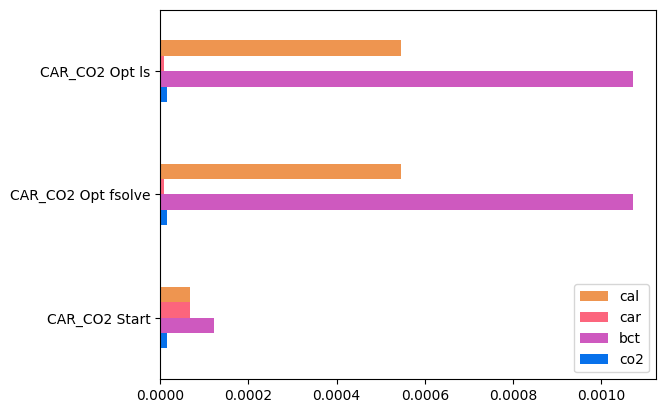

In [ ]:
#CO2 and carbonate system
from scipy.optimize import least_squares

import numpy as np                          #the numpy library contains fast math functions designed to operate on and store arrays of numbers
import matplotlib.pyplot as plt             #the matplotlib.pyplot library is used to make plots and figures
import pandas as pd                         #the pandas library deals with named columns and rows of data called a dataframe (similar to an Excel worksheet with customizable row and column labels)
from scipy.optimize import fsolve           #the scipy library has thousands of functions, fsolve is one for searching for the roots of a system of equations
from google.colab import data_table         #this colab library supports nice display (formatting) and interaction (sorting, downloading) with tables of data including pandas dataframes
data_table.enable_dataframe_formatter()                       #turn on interactive, nice formatting of tabular data
data_table._DEFAULT_FORMATTERS[float] = lambda x: f"{x:.3e}"  #change the default number format to be scientific notation with 3 digits after the decimal

Kh=3.40e-2                                  #Kh  = co2/atm      = x[1]/x[0]
Ka1=4.46e-7                                 #Ka1 = hdr*bct/co2  = x[4]*x[2]/x[1]
Ka2=4.69e-11                                #Ka2 = hdr*car/bct  = x[4]*x[3]/x[2]
Kw=1.0e-14                                  #Kw  = hdr*hox      = x[4]*x[5]
Ksp=4.6e-9                                  #Ksp = cal*car      = x[6]*x[3]

def FunCO2Car(x):
    f0=x[1]-(Kh)*(x[0])                         #Henry's Law
    f1=x[4]*x[2]-(Ka1*x[1])                     #Ka1 of dissolved CO2 to bicarbonate
    f2=x[4]*x[3]-(Ka2*x[2])                     #Ka2 of bicarbonate to carbonate
    f3=x[4]*x[5]-Kw                             #dissociation of water
    f4=x[6]*x[3]-Ksp                            #dissociation of calcium carbonate
    f5=x[2]+2*x[3]+x[5]-x[4]-2*x[6]             #charge balance (calcium is included but should not be present in CO2 only system)
    f6=x[0]-atm                                 #mass balance doesn't apply (carbon can come from atmospheric CO2 or calcium carbonate), atmospheric CO2 is fixed
    return np.array([f0,f1,f2,f3,f4,f5,f6])

dfCO2Car=pd.DataFrame(columns=["atm","co2","bct","car","hdr","hox","cal"]) #here we make an empty dataframe to hold all our results with 7 named columns, one for each unknown

ppm=420                                     #mixing ratio of CO2 in ppmv
atm=ppm/1.0e6
#initial guesses
co2=atm*Kh                                  #calculates the initial dissolved CO2 using Henry's Law constant
cal=np.sqrt(Ksp)                            #initial guess for calcium concentration based on Ksp
car=np.sqrt(Ksp)                            #initial guess for carbonate concentration based on Ksp
bct=np.sqrt(Ka1*co2) + np.sqrt(car*Kw/Ka2)  #initial guess for bicarbonate concentration based on sum of CO2 only and calcium carbonate
hdr=10**-(8.1)                              #initial guess for hydronium concentration based on ocean pH
hox=Kw/hdr                                  #initial guess for hydroxide based on hydronium
x0=np.array([atm,co2,bct,car,hdr,hox,cal])
dfCO2Car.loc["CAR_CO2 Start"]=x0
x=fsolve(FunCO2Car,x0)
res1=least_squares(FunCO2Car,x0,bounds=(0, 0.1),gtol=None,ftol=None,xtol=2.5e-16,max_nfev=10000,method="dogbox",jac='3-point')
x=res1.x
print(res1.message)
print(res1.optimality)

dfCO2Car.loc["CAR_CO2 Opt fsolve"]=x
dfCO2Car.loc["CAR_CO2 Opt ls"]=x
dfCO2Car[['co2','bct','car','cal']].plot.barh(color=chartColors,rot=0)
plt.legend(loc='lower right',reverse=True)
dfCO2Car
print("DIC =",dfCO2Car['co2']+dfCO2Car['bct']+dfCO2Car['car'])

In [ ]:
#CO2 and carbonate correct for salinity system
Kh=3.40e-2      #Kh  = co2/atm      = x[1]/x[0]
Ka1=4.46e-7     #Ka1 = hdr*bct/co2  = x[4]*x[2]/x[1]
Ka2=4.69e-11    #Ka2 = hdr*car/bct  = x[4]*x[3]/x[2]
Kw=1.0e-14      #Kw  = hdr*hox      = x[4]*x[5]
Ksp=4.6e-9      #Ksp = cal*car      = x[6]*x[3]

print("K0 = "+str(Kh))
print("Ka1 = "+str(Ka1))
print("Ka2 = "+str(Ka2))
print("Kw = "+str(Kw))
print("Ksp calcite = "+str(Ksp))

temp=20+273.15
sal=35
flgCorrectForTempAndSal=True

if flgCorrectForTempAndSal==True:
    Kh=np.exp(93.4517*(100/temp)-60.2409+23.3585*np.log(temp/100)+sal*(0.023517-0.023656*(temp/100)+0.004736*(temp/100)**2))
    print("Kh = "+str(Kh)+", change = "+str((Kh-3.40e-2)/3.40e-2*100)+"%")
    Ka1=10**( (-3633.86/temp) + 61.2172 - 9.67770*np.log(temp) + 0.011555*sal - 0.0001152*sal**2 )
    #print(-np.log10(eqK1))
    print("Ka1 = "+str(Ka1)+", change = "+str((Ka1-4.46e-7)/4.46e-7*100)+"%")
    Ka2=10**( (-471.78/temp) - 25.9290 + 3.16967*np.log(temp) + 0.01781*sal - 0.0001122*sal**2 )
    #print(-np.log10(eqK2))
    print("Ka2 = "+str(Ka2)+", change = "+str((Ka2-4.69e-11)/4.69e-11*100)+"%")
    Kw=np.exp(-13847.26/temp+148.9652-23.6531*np.log(temp)+(118.67/temp-5.977+1.0495*np.log(temp))*sal**(1/2)-0.01615*sal)
    print("Kw = "+str(Kw)+", change = "+str((Kw-1.0e-14)/1.0e-14*100)+"%")
    Ksp=10**( -171.9065 - 0.077993*temp + 2839.319/temp + 71.595*np.log10(temp) + (-0.77712+0.0028426*temp+178.34/temp)*sal**(1/2) - 0.07711*sal + 0.0041249*sal**1.5 )
    print("Ksp calcite = "+str(Ksp)+", change = "+str((Ksp-4.6e-9)/4.6e-9*100)+"%")
    KspPrime=Ka1*Ksp/Ka2
    print("Ksp prime = "+str(KspPrime))

def FunCO2Car(x):
    f0=x[1]-(Kh)*(x[0])                         #Henry's Law
    f1=x[4]*x[2]-(Ka1*x[1])                     #Ka1 of dissolved CO2 to bicarbonate
    f2=x[4]*x[3]-(Ka2*x[2])                     #Ka2 of bicarbonate to carbonate
    f3=x[4]*x[5]-Kw                             #dissociation of water
    f4=x[6]*x[3]-Ksp                            #dissociation of calcium carbonate
    f5=x[2]+2*x[3]+x[5]-x[4]-2*x[6]             #charge balance
    f6=x[0]-atm                                 #atmospheric CO2 is fixed, mass balance doesn't apply (carbon can come from atmospheric CO2 or calcium carbonate)
    return np.array([f0,f1,f2,f3,f4,f5,f6])

ppm=420                                     #mixing ratio of CO2 in ppmv
atm=ppm/1.0e6
#initial guesses
co2=atm*Kh                                  #calculates the initial dissolved CO2 using Henry's Law constant
cal=np.sqrt(Ksp)                            #initial guess for calcium concentration based on Ksp
car=np.sqrt(Ksp)                            #initial guess for carbonate concentration based on Ksp
bct=np.sqrt(Ka1*co2) + np.sqrt(car*Kw/Ka2)  #initial guess for bicarbonate concentration based on sum of CO2 only and calcium carbonate
hdr=10**-(8)                                #initial guess for hydronium concentration based on ocean pH
hox=Kw/hdr                                  #initial guess for hydroxide based on hydronium
x0=np.array([atm,co2,bct,car,hdr,hox,cal])
dfCO2CarSalt.loc["SAL_TMP Start"]=x0
x=fsolve(FunCO2Car,x0)
dfCO2CarSalt.loc["SAL_TMP Opt fsolve"]=x
res1=least_squares(FunCO2Car,x0,bounds=(0, 0.1),gtol=None,ftol=None,xtol=2.5e-16,max_nfev=10000,method="dogbox",jac='3-point') #the fsolve function takes the array of 5 equations and solves for the 5 unknowns using the x0 array as initial guesses
x=res1.x
print(res1.message)
print(res1.optimality)
#dfCO2CarSalt.loc["SAL_TMP Opt ls"]=x
dfCO2CarSalt[['co2','bct','car','cal']].plot.barh(color=chartColors,rot=0)
plt.legend(loc='lower right',reverse=True)
dfCO2CarSalt

In [ ]:
#CO2 and carbonate correct for salinity system
Kh=3.40e-2      #Kh  = co2/atm      = x[1]/x[0]
Ka1=4.46e-7     #Ka1 = hdr*bct/co2  = x[4]*x[2]/x[1]
Ka2=4.69e-11    #Ka2 = hdr*car/bct  = x[4]*x[3]/x[2]
Kw=1.0e-14      #Kw  = hdr*hox      = x[4]*x[5]
Ksp=4.6e-9      #Ksp = cal*car      = x[6]*x[3]

print("K0 = "+str(Kh))
print("Ka1 = "+str(Ka1))
print("Ka2 = "+str(Ka2))
print("Kw = "+str(Kw))
print("Ksp calcite = "+str(Ksp))

temp=25+273.15
sal=35
flgCorrectForTempAndSal=True

if flgCorrectForTempAndSal==True:
    Kh=np.exp(93.4517*(100/temp)-60.2409+23.3585*np.log(temp/100)+sal*(0.023517-0.023656*(temp/100)+0.004736*(temp/100)**2))
    print("Kh = "+str(Kh)+", change = "+str((Kh-3.40e-2)/3.40e-2*100)+"%")
    Ka1=10**( (-3633.86/temp) + 61.2172 - 9.67770*np.log(temp) + 0.011555*sal - 0.0001152*sal**2 )
    #print(-np.log10(eqK1))
    print("Ka1 = "+str(Ka1)+", change = "+str((Ka1-4.46e-7)/4.46e-7*100)+"%")
    Ka2=10**( (-471.78/temp) - 25.9290 + 3.16967*np.log(temp) + 0.01781*sal - 0.0001122*sal**2 )
    #print(-np.log10(eqK2))
    print("Ka2 = "+str(Ka2)+", change = "+str((Ka2-4.69e-11)/4.69e-11*100)+"%")
    Kw=np.exp(-13847.26/temp+148.9652-23.6531*np.log(temp)+(118.67/temp-5.977+1.0495*np.log(temp))*sal**(1/2)-0.01615*sal)
    print("Kw = "+str(Kw)+", change = "+str((Kw-1.0e-14)/1.0e-14*100)+"%")
    Ksp=10**( -171.9065 - 0.077993*temp + 2839.319/temp + 71.595*np.log10(temp) + (-0.77712+0.0028426*temp+178.34/temp)*sal**(1/2) - 0.07711*sal + 0.0041249*sal**1.5 )
    print("Ksp calcite = "+str(Ksp)+", change = "+str((Ksp-4.6e-9)/4.6e-9*100)+"%")
    KspPrime=Ka1*Ksp/Ka2
    print("Ksp prime = "+str(KspPrime))

def FunCO2Car(x):
    f0=x[1]-(Kh)*(x[0])                         #Henry's Law
    f1=x[4]*x[2]-(Ka1*x[1])                     #Ka1 of dissolved CO2 to bicarbonate
    f2=x[4]*x[3]-(Ka2*x[2])                     #Ka2 of bicarbonate to carbonate
    f3=x[4]*x[5]-Kw                             #dissociation of water
    f4=x[6]*x[3]-Ksp                            #dissociation of calcium carbonate
    f5=x[2]+2*x[3]+x[5]-x[4]-2*x[6]             #charge balance (calcium is included but should not be present in CO2 only system)
    f6=x[0]-atm                                 #mass balance doesn't apply (carbon can come from atmospheric CO2 or calcium carbonate), atmospheric CO2 is fixed
    return np.array([f0,f1,f2,f3,f4,f5,f6])

ppmList=np.arange(200,1510,10)                 #mixing ratio of CO2 in ppmv
dfRangeFsolve=pd.DataFrame(index=ppmList,columns=["atm","co2","bct","car","hdr","hox","cal"])
dfRangeLS=pd.DataFrame(index=ppmList,columns=["atm","co2","bct","car","hdr","hox","cal"])
#initial guesses
for ppm,index in zip(ppmList,range(len(ppmList))):
  if index==0:
    #x0LS=dfCO2CarSalt.loc["SAL_TMP Opt ls"]=x
    #x0LS=dfCO2CarSalt.loc["SAL_TMP Opt ls"]=x
    atm=ppm/1.0e6
    co2=atm*Kh                                  #calculates the initial dissolved CO2 using Henry's Law constant
    cal=np.sqrt(Ksp)                            #initial guess for calcium concentration based on Ksp
    car=np.sqrt(Ksp)                            #initial guess for carbonate concentration based on Ksp
    bct=np.sqrt(Ka1*co2) + np.sqrt(car*Kw/Ka2)  #initial guess for bicarbonate concentration based on sum of CO2 only and calcium carbonate
    hdr=10**-(8)                                #initial guess for hydronium concentration based on ocean pH
    hox=Kw/hdr                                  #initial guess for hydroxide based on hydronium
    x0FS=np.array([atm,co2,bct,car,hdr,hox,cal])
    x0LS=np.array([atm,co2,bct,car,hdr,hox,cal])
  else:
    atm=ppm/1.0e6
    x0FS=np.array(dfRangeFsolve.iloc[index-1,:],dtype=float)
    x0LS=np.array(dfRangeLS.iloc[index-1,:],dtype=float)
  xFS=fsolve(FunCO2Car,x0FS)
  dfRangeFsolve.iloc[index,:]=xFS
  res1=least_squares(FunCO2Car,x0LS,bounds=(0, 1),gtol=None,ftol=None,xtol=2.5e-16,max_nfev=100000,method="dogbox",jac='3-point')
  xLS=res1.x
  if res1.message!='`xtol` termination condition is satisfied.':
    print(str(ppm)+" ppm, "+res1.message+" opt="+str(res1.optimality))
  dfRangeLS.iloc[index,:]=xLS
dfRangeLS

In [ ]:
fig,axes=plt.subplots(4,1,figsize=(8,8),sharex=True)
axes[1].plot(ppmList,dfRangeLS['bct'],color=colors[2])
axes[1].set_ylabel(r"$ HCO^-_{3 \, (aq)}$")
axes[1].set_ylim([0,np.max(dfRangeLS['bct'])])
ax1Sec = axes[1].twinx()
ax1Sec.plot(ppmList,dfRangeLS['car'],color=colors[3])
ax1Sec.plot(ppmList,dfRangeLS['co2'],color=colors[1])
ax1Sec.set_ylabel(r"$ CO_{2 \, (aq)}^{*}$"+" and "+r"$ CO^{2-}_{3 \, (aq)}$")
ax1Sec.set_ylim([0,np.max(dfRangeLS['car'])])
dicT=np.array(dfRangeLS['car']+dfRangeLS['bct']+dfRangeLS['co2'],dtype='float')
dicL=np.array(dfRangeLS['cal'],dtype='float')
dicA=dicT-dicL
axes[2].plot(ppmList,dicT,color="k")
axes[2].set_ylabel(r"Total DIC")
axes[2].plot(ppmList,dicA,color="teal")
axes[2].fill_between(ppmList, dicT, dicA, color="lightgrey")
axes[2].fill_between(ppmList, dicA, 0, color=[.6,1,1])
axes[2].set_ylim([0,np.max(dicT)*1.05])
pH=-np.log10(np.array(dfRangeLS['hdr'],dtype='float'))
axes[0].plot(ppmList,pH,color=colors[4])
axes[0].hlines(-np.log10(np.array(dfRangeLS.loc[420,'hdr'],dtype='float')),0,420,linestyles='dashed',colors='black')
axes[0].vlines(420,-np.log10(np.array(dfRangeLS.loc[420,'hdr'],dtype='float')),np.min(pH),linestyles='dashed',colors='black')
axes[0].hlines(-np.log10(np.array(dfRangeLS.loc[280,'hdr'],dtype='float')),0,280,linestyles='dotted',colors='black')
axes[0].vlines(280,-np.log10(np.array(dfRangeLS.loc[280,'hdr'],dtype='float')),np.min(pH),linestyles='dotted',colors='black')
axes[0].set_ylim([np.min(pH),np.max(pH)])
axes[0].set_ylabel(r"pH")
axes[3].plot(ppmList,dfRangeLS['cal'],color=colors[6])
axes[3].set_ylabel(r"$ Ca^{2+}_{(aq)}$")
axes[3].hlines(dfRangeLS.loc[420,'cal'],0,420,linestyles='dashed',colors='black')
axes[3].vlines(420,dfRangeLS.loc[420,'cal'],0,linestyles='dashed',colors='black')
axes[3].hlines(dfRangeLS.loc[280,'cal'],0,280,linestyles='dotted',colors='black')
axes[3].vlines(280,dfRangeLS.loc[280,'cal'],0,linestyles='dotted',colors='black')
axes[3].set_ylim([0,np.max(dfRangeLS['cal']*1.05)])
axes[3].set_xlim([np.min(ppmList),np.max(ppmList)])
axes[3].set_xlabel("ppm $CO_2$")
fig.subplots_adjust(hspace=0.1)

In [ ]:
def Carbonic_pKas(t,s):
  # from https://www.sciencedirect.com/science/article/abs/pii/S0304420305001921
  pKa1n=-126.34048+6320.813/t+19.568224*np.log(t)
  a1=13.4191*s**0.5+0.0331*s-5.33e-5*s**2
  b1=-530.123*s**0.5-6.103*s
  c1=-2.06950*s**0.5
  pka1=a1+b1/t+c1*np.log(t)+pKa1n

  pKa2n=-90.18333+5143.692/t+14.613358*np.log(t)
  a2=21.0894*s**0.5+.1248*s-3.687e-4*s**2
  b2=-772.483*s**0.5-20.051*s
  c2=-3.3336*s**0.5
  pka2=a2+b2/t+c2*np.log(t)+pKa2n
  return [pka1,pka2]

def Davies(i,z):
  # https://en.wikipedia.org/wiki/Davies_equation
  pAlpha=0.5*z**2*(np.sqrt(i)/(1+np.sqrt(i))-0.3*i)
  return 10**-pAlpha


pka1,pka2=Carbonic_pKas(25+273.15,0)
print("pKa1 = "+str(pka1)+", Ka1 = "+str(10**-pka1))
print("pKa2 = "+str(pka2)+", Ka2 = "+str(10**-pka2))
actCoeff=Davies(0.71,2)
print("Activity coeff of +2= "+str(actCoeff))
actCoeff=Davies(0.71,1)
print("Activity coeff of +1= "+str(actCoeff))


In [ ]:
#CO2 and carbonate ocean range of temps
def FunCO2Car(x):
    f0=x[1]-(Kh)*(x[0])                         #Henry's Law
    f1=x[4]*x[2]-(Ka1*x[1])                     #Ka1 of dissolved CO2 to bicarbonate
    f2=x[4]*x[3]-(Ka2*x[2])                     #Ka2 of bicarbonate to carbonate
    f3=x[4]*x[5]-Kw                             #dissociation of water
    f4=x[6]*x[3]-Ksp                            #dissociation of calcium carbonate
    f5=x[2]+2*x[3]+x[5]-x[4]-2*x[6]             #charge balance (calcium is included but should not be present in CO2 only system)
    f6=x[0]-atm                                 #mass balance doesn't apply (carbon can come from atmospheric CO2 or calcium carbonate), atmospheric CO2 is fixed
    return np.array([f0,f1,f2,f3,f4,f5,f6])

ppm=420
sal=35
flgCorrectForTempAndSal=True
tempList=np.arange(0,30,1)
dfRangeTemp=pd.DataFrame(index=tempList,columns=["atm","co2","bct","car","hdr","hox","cal","Kh","Ka1","Ka2","Kw","Ksp"])
for tempC,index in zip(tempList,range(len(tempList))):
    temp=tempC+273.15
    Kh=np.exp(93.4517*(100/temp)-60.2409+23.3585*np.log(temp/100)+sal*(0.023517-0.023656*(temp/100)+0.004736*(temp/100)**2))
    dfRangeTemp.iloc[index,7]=Kh
    Ka1=10**( (-3633.86/temp) + 61.2172 - 9.67770*np.log(temp) + 0.011555*sal - 0.0001152*sal**2 )
    dfRangeTemp.iloc[index,8]=Ka1
    Ka2=10**( (-471.78/temp) - 25.9290 + 3.16967*np.log(temp) + 0.01781*sal - 0.0001122*sal**2 )
    dfRangeTemp.iloc[index,9]=Ka2
    Kw=np.exp(-13847.26/temp+148.9652-23.6531*np.log(temp)+(118.67/temp-5.977+1.0495*np.log(temp))*sal**(1/2)-0.01615*sal)
    dfRangeTemp.iloc[index,10]=Kw
    Ksp=10**( -171.9065 - 0.077993*temp + 2839.319/temp + 71.595*np.log10(temp) + (-0.77712+0.0028426*temp+178.34/temp)*sal**(1/2) - 0.07711*sal + 0.0041249*sal**1.5 )
    dfRangeTemp.iloc[index,11]=Ksp
    if index==0:
      atm=ppm/1.0e6
      co2=atm*Kh                                  #calculates the initial dissolved CO2 using Henry's Law constant
      cal=np.sqrt(Ksp)                            #initial guess for calcium concentration based on Ksp
      car=np.sqrt(Ksp)                            #initial guess for carbonate concentration based on Ksp
      bct=np.sqrt(Ka1*co2) + np.sqrt(car*Kw/Ka2)  #initial guess for bicarbonate concentration based on sum of CO2 only and calcium carbonate
      hdr=10**-(8)                                #initial guess for hydronium concentration based on ocean pH
      hox=Kw/hdr                                  #initial guess for hydroxide based on hydronium
      x0=np.array([atm,co2,bct,car,hdr,hox,cal])
    else:
      atm=ppm/1.0e6
      x0=np.array(dfRangeTemp.iloc[index-1,0:7],dtype=float)
    res1=least_squares(FunCO2Car,x0,bounds=(0, 1),gtol=None,ftol=None,xtol=2.5e-16,max_nfev=100000,method="dogbox",jac='3-point')
    x=res1.x
    if res1.message!='`xtol` termination condition is satisfied.':
      print(str(ppm)+" ppm, "+res1.message+" opt="+str(res1.optimality))
    dfRangeTemp.iloc[index,0:7]=x
dfRangeTemp

In [ ]:
fig,axes=plt.subplots(4,1,figsize=(8,8),sharex=True)
axes[1].plot(tempList,dfRangeTemp['bct'],color=colors[2])
axes[1].set_ylabel(r"$ HCO^-_{3 \, (aq)}$")
axes[1].set_ylim([0,np.max(dfRangeTemp['bct'])])
ax1Sec = axes[1].twinx()
ax1Sec.plot(tempList,dfRangeTemp['car'],color=colors[3])
ax1Sec.plot(tempList,dfRangeTemp['co2'],color=colors[1])
ax1Sec.set_ylabel(r"$ CO_{2 \, (aq)}^{*}$"+" and "+r"$ CO^{2-}_{3 \, (aq)}$")
ax1Sec.set_ylim([0,np.max(dfRangeTemp['car'])])
dicT=np.array(dfRangeTemp['car']+dfRangeTemp['bct']+dfRangeTemp['co2'],dtype='float')
dicL=np.array(dfRangeTemp['cal'],dtype='float')
dicA=dicT-dicL
axes[2].plot(tempList,dicT,color="k")
axes[2].set_ylabel(r"Total DIC")
axes[2].plot(tempList,dicA,color="teal")
axes[2].fill_between(tempList, dicT, dicA, color="lightgrey")
axes[2].fill_between(tempList, dicA, 0, color=[.6,1,1])
axes[2].set_ylim([0,np.max(dicT)*1.05])
pH=-np.log10(np.array(dfRangeTemp['hdr'],dtype='float'))
axes[0].plot(tempList,pH,color=colors[4])
axes[0].set_ylim([np.min(pH),np.max(pH)])
axes[0].set_ylabel(r"pH")
axes[3].plot(tempList,dfRangeTemp['cal'],color=colors[6])
axes[3].set_ylabel(r"$ Ca^{2+}_{(aq)}$")
axes[3].set_ylim([np.min(dfRangeTemp['cal']),np.max(dfRangeTemp['cal']*1.05)])
axes[3].set_xlim([np.min(tempList),np.max(tempList)])
axes[3].set_xlabel("temp ($^oC$)")
fig.subplots_adjust(hspace=0.1)

In [ ]:
#OLDER CODE CELL
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve
from google.colab import files

def f(x):
    f0=x[1]-(1.7e-3)*(x[0]) #these two are often combined
    f1=x[4]*x[2]-(2.5e-4)*x[1] # to give Ka1 of 4.46e-7
    f2=x[4]*x[3]-(4.69e-11)*x[2]
    f3=x[4]*x[5]-1.0e-14
    f4=x[2]+2*x[3]+x[5]-x[4]
    f5=x[0]+x[1]+x[2]+x[3]-B
    return np.array([f0,f1,f2,f3,f4,f5])

#creates an array for the initial partial pressure of CO2 in atm with a range of 0 to 5 atm and step size 0.001
#must use numpy arange() because range() only allows integers
#P=np.array(np.arange(0,5.1,0.001))
#further defines low pressure and high pressure ranges with different step sizes
#pressures=np.arange(0,0.1,0.001)
#pressures=np.arange(0.1,5.1,0.1)

#creates an array for the initial partial pressure of CO2 in atm with a range of 0 to 5 atm and step size 0.001
pressures=np.arange(0,5.1,0.001)

#create a Pandas dataFrame with a row for each pressure and columns for pressure, concentration of aqueous species, pH, and residuals
#pre-allocating the memory makes the loop run in reasonable time and makes it possible to insert values into the dataFrame using their index in each iteration of the loop using .iloc
dfResults=pd.DataFrame(index=pressures,columns=["P","[CO2]","[H2CO3]","[HCO3 -]","[CO3 2-]","[H +]","[OH -]","pH","residuals"])

#for loop in which fsolve is performed iteratively for each value of pressure
for pressure,index in zip(pressures,range(len(pressures))):
    #initial guesses assuming independent equilibria
    B=pressure*0.034 #Calculates the initial dissolved CO2 using Henry's Law constant
    C=0.0017*B #initial guess for H2CO3 concentration
    D=np.sqrt(0.00025*C) #initial guess for HCO3- concentration
    E=np.sqrt(4.69e-11*D) #initial guess for CO3 2- concentration
    F=np.sqrt(1e-14) #initial guess for H+ concentration
    G=np.sqrt(1e-14) #initial guess for OH- concentration
    x0=np.array([B,C,D,E,F,G]) #initial guess array

    x=fsolve(f,x0) #the fsolve function takes the array of 6 equations and solves for the 6 unknowns using the x0 array as initial guesses

    dfResults.iloc[index,0]=pressure #this puts the pressure of CO2 into the dataframe
    dfResults.iloc[index,1:7]=x #this puts the 6 concentrations into the dataframe (the notation "1:7" does not include the largest index and writes into indexes 1 to 6)
    dfResults.iloc[index,7]=-np.log10(x[4]) #this calculates the pH based on the solution for x[4]
    dfResults.iloc[index,8]=np.sum(f(x)) #this sums up the values of all the functions in the f(x) array. Valid solutions will yield residuals of zero or almost zero.

fig,ax=plt.subplots(figsize=(16,8))
ax.plot(dfResults["P"],dfResults["pH"])
ax.set_ylabel("Calculated pH")
ax.set_xlabel(r"$P_{CO_2}$ (atm)")
fig.show()
dfResults.to_excel("CO2 equilibrium results.xlsx")
files.download("CO2 equilibrium results.xlsx")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve
!pip install xlsxwriter
import xlsxwriter as xlsx
from google.colab import files

flgCorrectForTempAndSal=False

if flgCorrectForTempAndSal==True:
    temp=25+273.15
    sal=35

    eqKo=np.exp(93.4517*(100/temp)-60.2409+23.3585*np.log(temp/100)+sal*(0.023517-0.023656*(temp/100)+0.004736*(temp/100)**2))
    print("K0 = "+str(eqKo))
    eqK1=10**( (-3633.86/temp) + 61.2172 - 9.67770*np.log(temp) + 0.011555*sal - 0.0001152*sal**2 )
    #print(-np.log10(eqK1))
    print("Ka1 = "+str(eqK1))
    eqK2=10**( (-471.78/temp) - 25.9290 + 3.16967*np.log(temp) + 0.01781*sal - 0.0001122*sal**2 )
    #print(-np.log10(eqK2))
    print("Ka2 = "+str(eqK2))
    eqKw=np.exp(-13847.26/temp+148.9652-23.6531*np.log(temp)+(118.67/temp-5.977+1.0495*np.log(temp))*sal**(1/2)-0.01615*sal)
    print("Kw = "+str(eqKw))
    eqKspCalcite=10**( -171.9065 - 0.077993*temp + 2839.319/temp + 71.595*np.log10(temp) + (-0.77712+0.0028426*temp+178.34/temp)*sal**(1/2) - 0.07711*sal + 0.0041249*sal**1.5 )
    print("Ksp calcite = "+str(eqKspCalcite))
    eqK2effSea = 10**-(1394.7/temp + 4.77 - 0.0184*sal + 0.000118*sal**2)
    print("K0 = "+str(eqK2effSea))
else:
    eqKo=3.4e-2
    eqK1=4.5e-7
    eqK2=4.7e-11
    eqKspCalcite=4.6e-9
    eqKw=1.0e-14

def carbonDioxideInSeawaterPos(concs):
  #fugacityCO2=concs[0]
  carbonicAndDissolvedCO2=concs[0]**2
  bicarbonate=concs[1]**2
  carbonate=concs[2]**2
  hydronium=concs[3]**2
  hydroxide=concs[4]**2
  calcium=concs[5]**2
  henry=carbonicAndDissolvedCO2/fugacityCO2**2-eqKo**2
  acid1=hydronium*bicarbonate/carbonicAndDissolvedCO2-eqK1**2
  acid2=hydronium*carbonate/bicarbonate-eqK2**2
  autodissociation=hydronium*hydroxide-eqKw**2
  #massBalanceCarbon=carbonicAndDissolvedCO2+bicarbonate+carbonate-(fugacityCO2*eqKo)
  chargeBalance=bicarbonate+2**2*carbonate+hydroxide-hydronium-2**2*calcium
  calcite=calcium*carbonate-eqKspCalcite**2
  #return np.array([henry,acid1,acid2,autodissociation,massBalanceCarbon,chargeBalance])
  return np.array([henry,acid1,acid2,autodissociation,chargeBalance,calcite])

def carbonDioxideInSeawater(concs):
  #fugacityCO2=concs[0]
  carbonicAndDissolvedCO2=concs[0]
  bicarbonate=concs[1]
  carbonate=concs[2]
  hydronium=concs[3]
  hydroxide=concs[4]
  calcium=concs[5]
  henry=carbonicAndDissolvedCO2/fugacityCO2-eqKo
  acid1=hydronium*bicarbonate/carbonicAndDissolvedCO2-eqK1
  acid2=hydronium*carbonate/bicarbonate-eqK2
  autodissociation=hydronium*hydroxide-eqKw
  #massBalanceCarbon=carbonicAndDissolvedCO2+bicarbonate+carbonate-(fugacityCO2*eqKo)
  chargeBalance=bicarbonate+2*carbonate+hydroxide-hydronium-2*calcium
  calcite=calcium*carbonate-eqKspCalcite
  #return np.array([henry,acid1,acid2,autodissociation,massBalanceCarbon,chargeBalance])
  returnVals=np.array([henry,acid1,acid2,autodissociation,chargeBalance,calcite])
  return returnVals

pressures=np.arange(100.0,1000.0,1)/1e6
dfResults=pd.DataFrame(index=pressures,columns=["P","[CO2_H2CO3]","[HCO3 -]","[CO3 2-]","[H +]","[OH -]","[Ca 2+]","pH","residuals"])

for pressure,index in zip(pressures,range(len(pressures))):
  #pressure=410.0/1e6
  if index==0:
      fugacityCO2=pressure
      # carbonicAndDissolvedCO2=pressure*eqKo
      # bicarbonate=np.sqrt(eqK1*carbonicAndDissolvedCO2)
      # carbonate=np.sqrt(eqK2*bicarbonate)
      # hydronium=2e-9
      # hydroxide=eqKw/hydronium
      # calcium=np.sqrt(eqKspCalcite)
      # intialGuesses=np.array([carbonicAndDissolvedCO2,bicarbonate,carbonate,hydronium,hydroxide,calcium])
      intialGuesses=np.array([3.40000000e-06, 6.58885243e-04, 1.33360124e-05, 2.32210391e-09, 4.30643949e-06, 3.44930692e-04])
  else:
      fugacityCO2=pressure
      intialGuesses=np.array(dfResults.iloc[index-1,1:7],dtype=float)

  #fsolve
  [carbonicAndDissolvedCO2,bicarbonate,carbonate,hydronium,hydroxide,calcium]=fsolve(carbonDioxideInSeawater,intialGuesses)
  #[carbonicAndDissolvedCO2,bicarbonate,carbonate,hydronium,hydroxide,calcium]=fsolve(carbonDioxideInSeawaterPos,intialGuesses)
  dfResults.iloc[index,0]=pressure
  dfResults.iloc[index,1]=carbonicAndDissolvedCO2
  dfResults.iloc[index,2]=bicarbonate
  dfResults.iloc[index,3]=carbonate
  dfResults.iloc[index,4]=hydronium
  dfResults.iloc[index,5]=hydroxide
  dfResults.iloc[index,6]=calcium
  dfResults.iloc[index,7]=-np.log10(hydronium)
  dfResults.iloc[index,8]=np.sum(carbonDioxideInSeawater([carbonicAndDissolvedCO2,bicarbonate,carbonate,hydronium,hydroxide,calcium]))

fig,[ax,ax2]=plt.subplots(1,2,figsize=(16,8))
ax.plot(dfResults["P"],dfResults["pH"],'k',label='pH')
ax2.plot(dfResults["P"],dfResults["[CO2_H2CO3]"],'r',label=r'$H_2CO_3$')
ax2.plot(dfResults["P"],dfResults["[HCO3 -]"],'g',label=r'$HCO_3^-$')
ax2.plot(dfResults["P"],dfResults["[CO3 2-]"],'b',label=r'$CO3^{2-}$')
ax2.plot(dfResults["P"],dfResults["[H +]"],'c',label='hydronium')
ax2.plot(dfResults["P"],dfResults["[OH -]"],'y',label='hydroxide')
ax2.plot(dfResults["P"],dfResults["[Ca 2+]"],'m',label='calcium')
ax2.legend()
ax.legend()
ax.set_ylabel("Calculated pH")
ax.set_xlabel(r"$P_{CO_2}$ (atm)")
ax2.set_ylabel("Calculated concentrations (M)")
ax2.set_xlabel(r"$P_{CO_2}$ (atm)")
fig.show()
dfResults.to_excel("CO2 Equilibrium Results.xlsx")
files.download("CO2 Equilibrium Results.xlsx")
print(dfResults)